In [ ]:
# !pip install statsmodels


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Exercise 1

In [8]:
# Generate 1000 samples from standard normal distribution
samples = np.random.normal(loc=0, scale=1, size=1000)

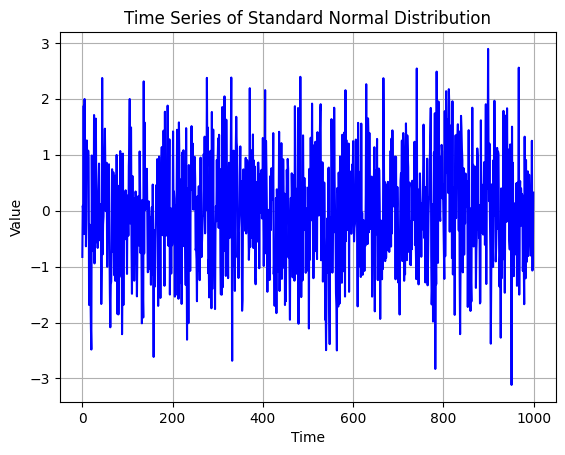

In [5]:
# Create time indices
time_indices = np.arange(1000)

# Plot time series
plt.plot(time_indices, samples, color='blue')
plt.title('Time Series of Standard Normal Distribution')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

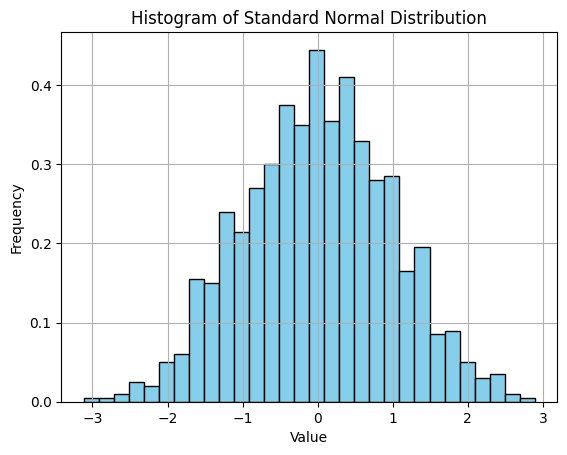

In [6]:
# Plot histogram
plt.hist(samples, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Standard Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Exercise 2

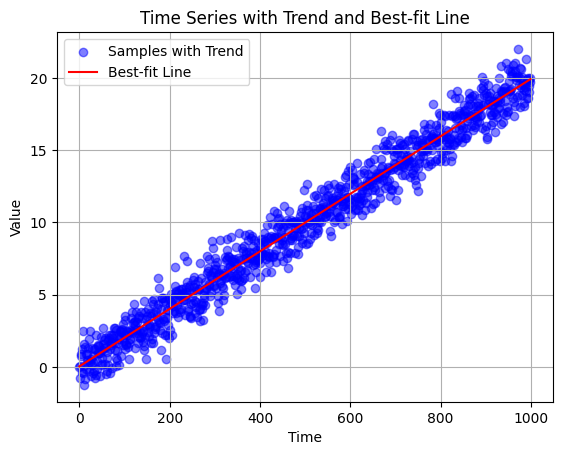

In [13]:
# Adding a linear trend to the samples
trend = 0.02 * time_indices  # Adjust the slope for the trend
samples_with_trend = samples + trend

# Plot scatter plot of the time series with trend
plt.scatter(time_indices, samples_with_trend, color='blue', alpha=0.5, label='Samples with Trend')

# Find and plot the best-fit line
slope, intercept, r_value, p_value, std_err = stats.linregress(time_indices, samples_with_trend)
best_fit_line = slope * time_indices + intercept
plt.plot(time_indices, best_fit_line, color='red', label='Best-fit Line')

plt.title('Time Series with Trend and Best-fit Line')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Exercise 3

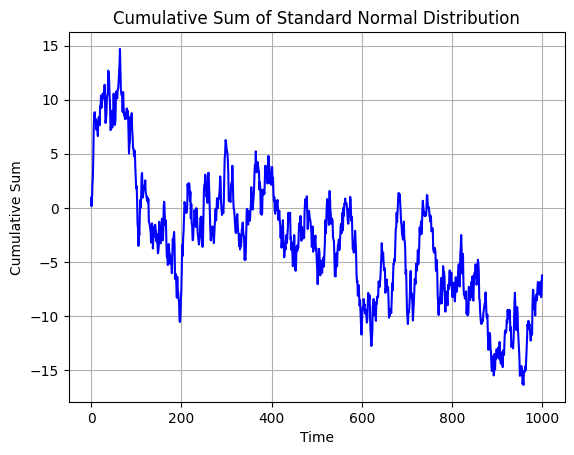

In [16]:
# Apply cumulative sum
cumulative_sum = np.cumsum(samples)

# Plot the cumulative sum
plt.plot(cumulative_sum, color='blue')
plt.title('Cumulative Sum of Standard Normal Distribution')
plt.xlabel('Time')
plt.ylabel('Cumulative Sum')
plt.grid(True)
plt.show()


When you apply `np.cumsum()` (cumulative sum) to a series of random noise, it effectively integrates the noise over time, accumulating the values. This process can resemble a random walk.

The resulting plot demonstrates the cumulative effect of adding each value of the random noise sequentially, which resembles a random walk process.

# Exercise 4

/tmp/ipykernel_68738/2306259035.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, covariance_matrix, size=1000)


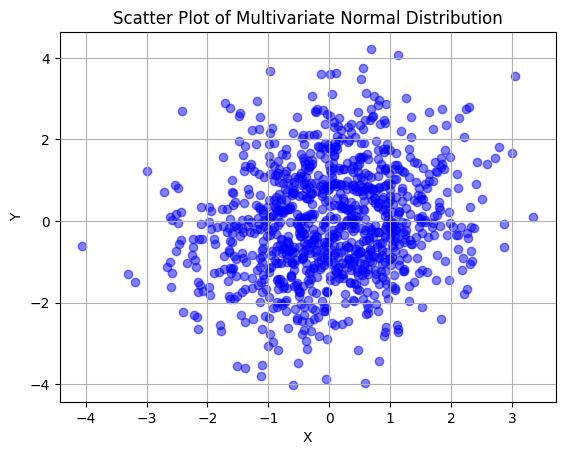

In [19]:
# Mean vector and covariance matrix for multivariate normal distribution
mean = [0, 0]  # mean vector
covariance_matrix = [[1, -0.5], [0.5, 2]]  # covariance matrix

# Generate 1000 samples from multivariate normal distribution
samples = np.random.multivariate_normal(mean, covariance_matrix, size=1000)

# Extract x and y coordinates
x = samples[:, 0]
y = samples[:, 1]

# Plot the samples
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('Scatter Plot of Multivariate Normal Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# Exercise 5

In [21]:
# Calculate sample mean
sample_mean = np.mean(samples, axis=0)

# Calculate sample covariance
sample_covariance = np.cov(samples, rowvar=False)

print("Sample Mean:")
print(sample_mean)

print("\nSample Covariance Matrix:")
print(sample_covariance)

Sample Mean:
[ 0.01227202 -0.04530625]

Sample Covariance Matrix:
[[1.19518556 0.26098073]
 [0.26098073 1.92373372]]


In [20]:
# Calculate sample mean
sample_mean = np.sum(samples, axis=0) / len(samples)

# Calculate sample covariance
centered_samples = samples - sample_mean
sample_covariance = np.dot(centered_samples.T, centered_samples) / (len(samples) - 1)

print("Sample Mean:")
print(sample_mean)

print("\nSample Covariance Matrix:")
print(sample_covariance)

Sample Mean:
[ 0.01227202 -0.04530625]

Sample Covariance Matrix:
[[1.19518556 0.26098073]
 [0.26098073 1.92373372]]


# Basic

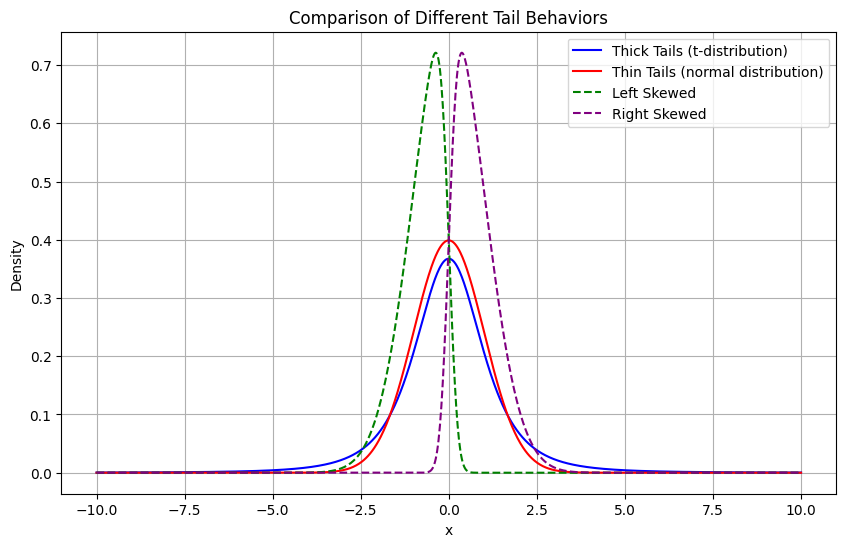

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, skewnorm

# Parameters
df = 3  # degrees of freedom for t-distribution
alpha_left = -5  # left skewness parameter
alpha_right = 5  # right skewness parameter

# Generate data
x = np.linspace(-10, 10, 1000)
t_dist = t.pdf(x, df)
norm_dist = norm.pdf(x)
skew_left_dist = skewnorm.pdf(x, alpha_left)
skew_right_dist = skewnorm.pdf(x, alpha_right)

# Plot distributions
plt.figure(figsize=(10, 6))

# Thick Tails (t-distribution)
plt.plot(x, t_dist, label='Thick Tails (t-distribution)', color='blue')

# Thin Tails (normal distribution)
plt.plot(x, norm_dist, label='Thin Tails (normal distribution)', color='red')

# Left Skewed Distribution
plt.plot(x, skew_left_dist, label='Left Skewed', color='green', linestyle='--')

# Right Skewed Distribution
plt.plot(x, skew_right_dist, label='Right Skewed', color='purple', linestyle='--')

plt.title('Comparison of Different Tail Behaviors')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


## QQ Plots

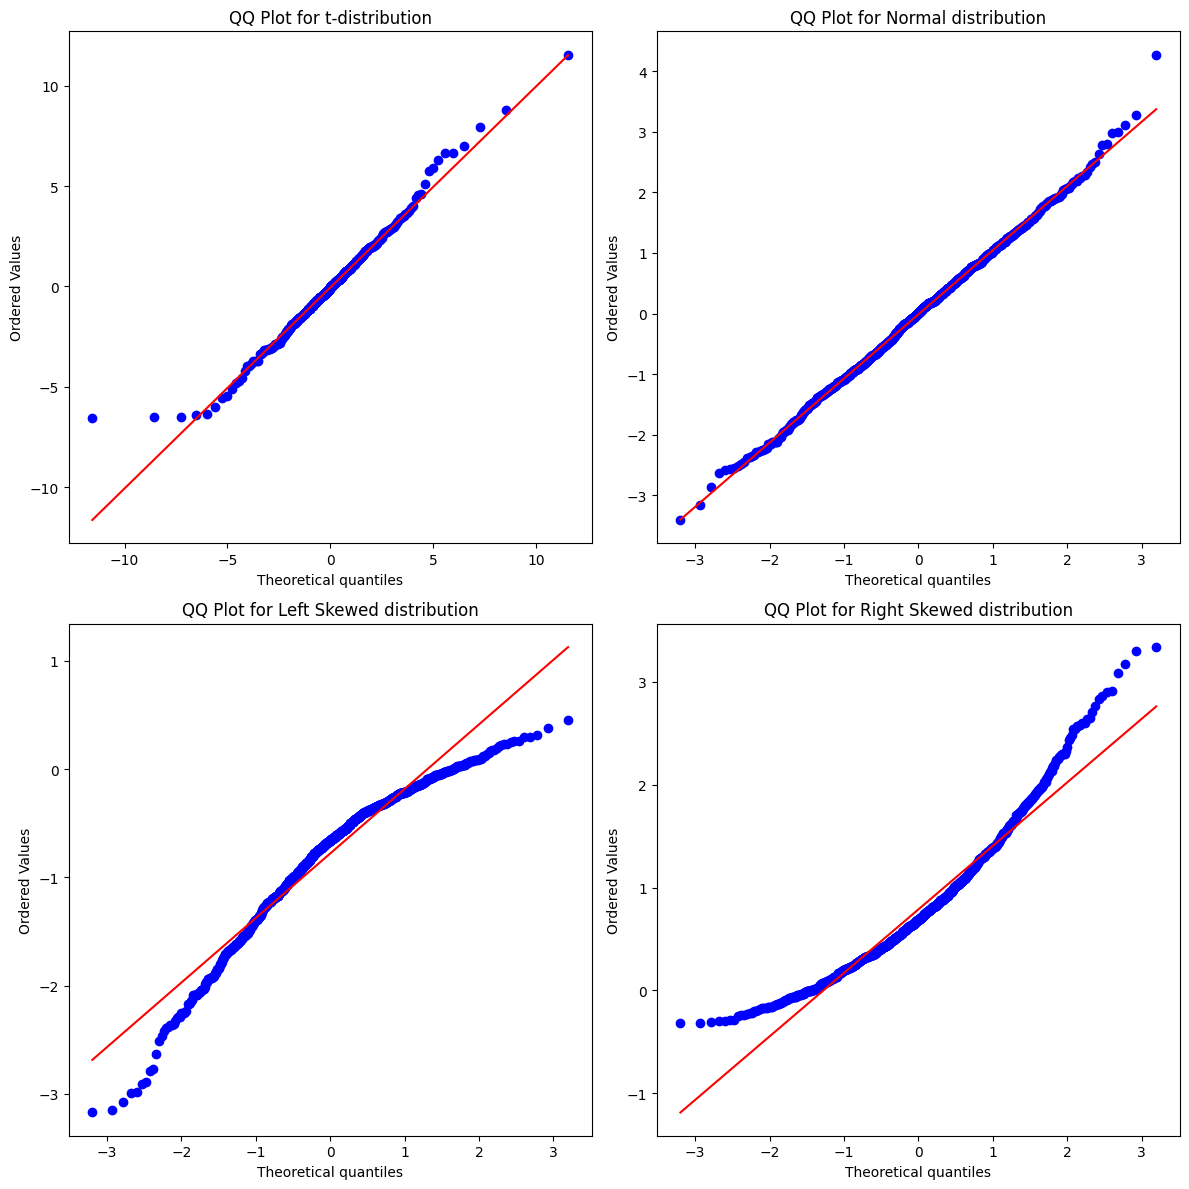

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, skewnorm, probplot

# Parameters
df = 3  # degrees of freedom for t-distribution
alpha_left = -5  # left skewness parameter
alpha_right = 5  # right skewness parameter

# Generate data
x = np.linspace(-10, 10, 1000)
t_dist = t.rvs(df, size=1000)
norm_dist = norm.rvs(size=1000)
skew_left_dist = skewnorm.rvs(alpha_left, size=1000)
skew_right_dist = skewnorm.rvs(alpha_right, size=1000)

# Create QQ plots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# QQ plot for t-distribution
probplot(t_dist, dist="t", sparams=(df,), plot=axs[0, 0])
axs[0, 0].set_title('QQ Plot for t-distribution')

# QQ plot for normal distribution
probplot(norm_dist, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('QQ Plot for Normal distribution')

# QQ plot for left skewed distribution
probplot(skew_left_dist, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('QQ Plot for Left Skewed distribution')

# QQ plot for right skewed distribution
probplot(skew_right_dist, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('QQ Plot for Right Skewed distribution')

plt.tight_layout()
plt.show()

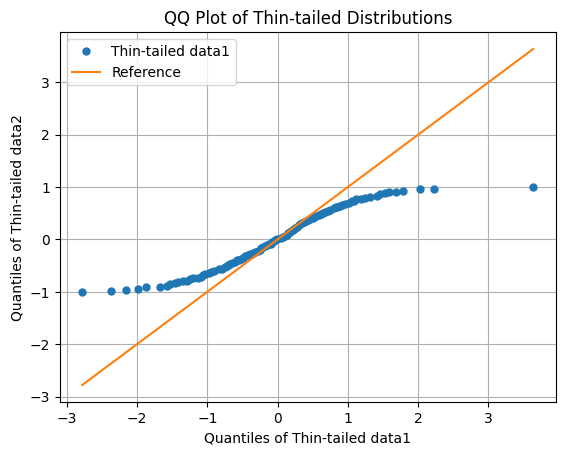

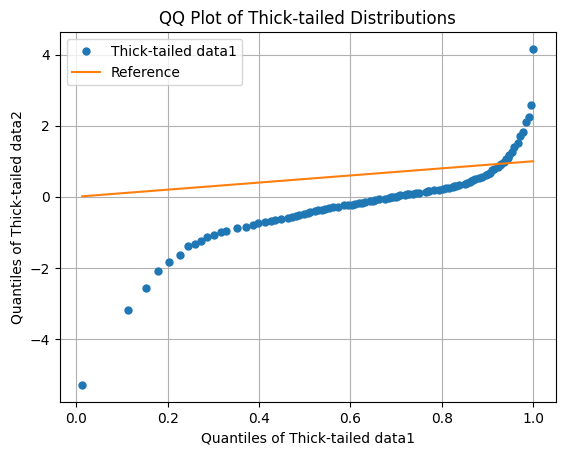

In [9]:
import matplotlib.pyplot as plt
import numpy as np


def qqplot(data1, data2, label1="data1", label2="data2", title="QQ Plot"):
    """
    Generates a QQ plot comparing two datasets.

    Args:
        data1 (list or np.array): The first dataset.
        data2 (list or np.array): The second dataset.
        label1 (str, optional): The label for the first dataset. Defaults to "data1".
        label2 (str, optional): The label for the second dataset. Defaults to "data2".
        title (str, optional): The title of the plot. Defaults to "QQ Plot".
    """

    quantiles1 = np.quantile(data1, np.linspace(0, 1, 100))
    quantiles2 = np.quantile(data2, np.linspace(0, 1, 100))

    quantiles1.sort()
    quantiles2.sort()

    plt.plot(quantiles1, quantiles2, "o", markersize=5, label=label1)
    plt.plot(quantiles1, quantiles1, "-", label="Reference")
    plt.xlabel("Quantiles of " + label1)
    plt.ylabel("Quantiles of " + label2)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()


# Simulate data with thin tails
data1_thin = np.random.normal(loc=0, scale=1, size=1000)
data2_thin = np.random.uniform(low=-1, high=1, size=1000)

# Simulate data with thick tails
data1_thick = np.random.power(2, size=1000)
data2_thick = np.random.laplace(loc=0, scale=1 / np.sqrt(2), size=1000)

# Generate QQ plots
qqplot(data1_thin, data2_thin, label1="Thin-tailed data1", label2="Thin-tailed data2", title="QQ Plot of Thin-tailed Distributions")
qqplot(data1_thick, data2_thick, label1="Thick-tailed data1", label2="Thick-tailed data2", title="QQ Plot of Thick-tailed Distributions")

# Time Series

## Random Walk Simulation

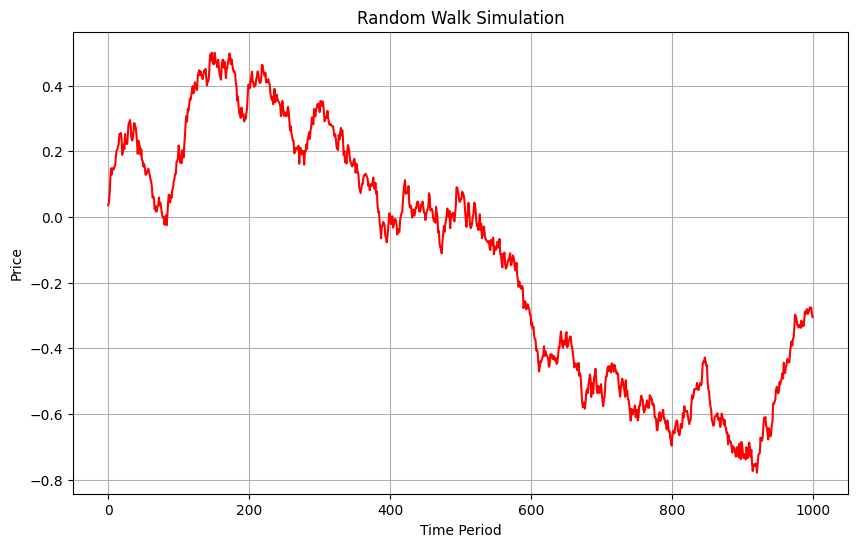

In [3]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Setting parameters
np.random.seed(0)
num_periods = 1000
mean_return = 0.0006
std_dev = 0.02

# Simulating random walk
returns = np.random.normal(mean_return, std_dev, num_periods)
prices = np.cumsum(returns)

# Plotting random walk
plt.figure(figsize=(10, 6))
plt.plot(prices, color='red')
plt.title('Random Walk Simulation')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.grid(True)
plt.show()


## Simple Moving Average

In [7]:
import numpy as np

def generate_log_returns(num_days, mu, sigma):
    np.random.seed(0)
    return np.random.normal(mu, sigma, num_days)

def simple_moving_average(data, window_size):
    sma = np.convolve(data, np.ones(window_size), 'valid') / window_size
    return sma

# Parameters
num_days = 100
mu = 0.001  # mean of the log returns
sigma = 0.02  # standard deviation of the log returns
window_size = 10  # size of the moving average window

# Generate log returns
log_returns = generate_log_returns(num_days, mu, sigma)

# Calculate Simple Moving Average
sma = simple_moving_average(log_returns, window_size)

print("Log Returns:")
print(log_returns)
print("\nSimple Moving Average with window size", window_size, ":")
print(sma)


Log Returns:
[ 0.03628105  0.00900314  0.02057476  0.04581786  0.03835116 -0.01854556
  0.02000177 -0.00202714 -0.00106438  0.00921197  0.00388087  0.03008547
  0.01622075  0.0034335   0.00987726  0.00767349  0.03088158 -0.00310317
  0.00726135 -0.01608191 -0.0500598   0.01407237  0.01828872 -0.0138433
  0.04639509 -0.02808731  0.00191517 -0.00274368  0.03165558  0.03038718
  0.00409895  0.00856325 -0.01675571 -0.03861593 -0.00595824  0.00412698
  0.02560581  0.0250476  -0.00674654 -0.00504606 -0.01997106 -0.02740036
 -0.0331254   0.04001551 -0.00919304 -0.00776149 -0.02405591  0.01654981
 -0.03127796 -0.00325481 -0.01690933  0.00873805 -0.0092161  -0.02261264
  0.00043636  0.00956664  0.00233034  0.00704944 -0.01168644 -0.00625482
 -0.01244921 -0.00619106 -0.01526293 -0.03352565  0.00454852 -0.00703562
 -0.03160397  0.01025565 -0.01714597  0.00203891  0.01558181  0.00357966
  0.02378801 -0.02369652  0.00904683 -0.0126962  -0.01641594 -0.01057699
 -0.00523105  0.00212331 -0.022303    0

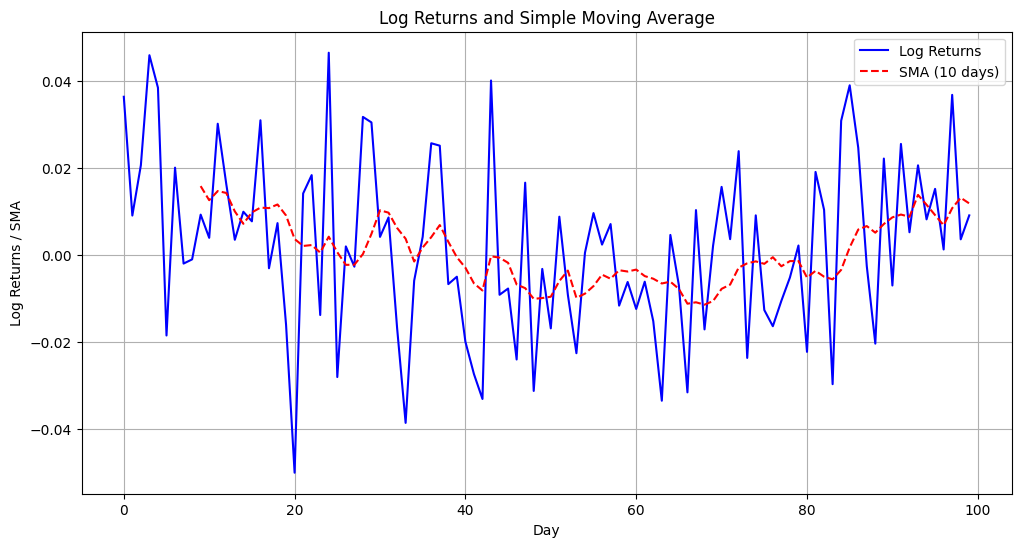

In [8]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(log_returns, label='Log Returns', color='blue')
plt.plot(range(window_size - 1, num_days), sma, label=f'SMA ({window_size} days)', color='red', linestyle='--')
plt.title('Log Returns and Simple Moving Average')
plt.xlabel('Day')
plt.ylabel('Log Returns / SMA')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
import numpy as np

def convolve(input_array, kernel, mode='full'):
    if mode not in ['full', 'valid', 'same']:
        raise ValueError("Invalid mode. Mode must be one of 'full', 'valid', or 'same'.")

    input_shape = np.array(input_array.shape)
    kernel_shape = np.array(kernel.shape)

    if mode == 'full':
        output_shape = input_shape + kernel_shape - 1
        pad_width = [(kernel_shape[i] - 1, 0) for i in range(len(kernel_shape))]
        padded_input = np.pad(input_array, pad_width, mode='constant')
    elif mode == 'valid':
        output_shape = np.maximum(input_shape - kernel_shape + 1, 0)
        padded_input = input_array
    elif mode == 'same':
        output_shape = input_shape
        pad_width = [(kernel_shape[i] - 1, kernel_shape[i] - 1) for i in range(len(kernel_shape))]
        padded_input = np.pad(input_array, pad_width, mode='constant')

    output_array = np.zeros(output_shape)

    for i in range(output_shape[0]):
        for j in range(output_shape[1]):
            output_array[i, j] = np.sum(padded_input[i:i+kernel_shape[0], j:j+kernel_shape[1]] * kernel)

    return output_array

# Example usage:
input_array = np.array([[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]])

kernel = np.array([[1, 0],
                   [0, 1]])

print("Input Array:")
print(input_array)

print("\nKernel:")
print(kernel)

print("\nConvolution (Full):")
print(convolve(input_array, kernel, mode='full'))

print("\nConvolution (Valid):")
print(convolve(input_array, kernel, mode='valid'))

print("\nConvolution (Same):")
print(convolve(input_array, kernel, mode='same'))


Input Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Kernel:
[[1 0]
 [0 1]]

Convolution (Full):
[[ 1.  2.  3.  3.]
 [ 4.  6.  8.  9.]
 [ 7. 12. 14. 15.]
 [ 7. 15. 17. 18.]]

Convolution (Valid):
[[ 6.  8.]
 [12. 14.]]

Convolution (Same):
[[ 1.  2.  3.]
 [ 4.  6.  8.]
 [ 7. 12. 14.]]


## Exponentially-Weighted Moving Average

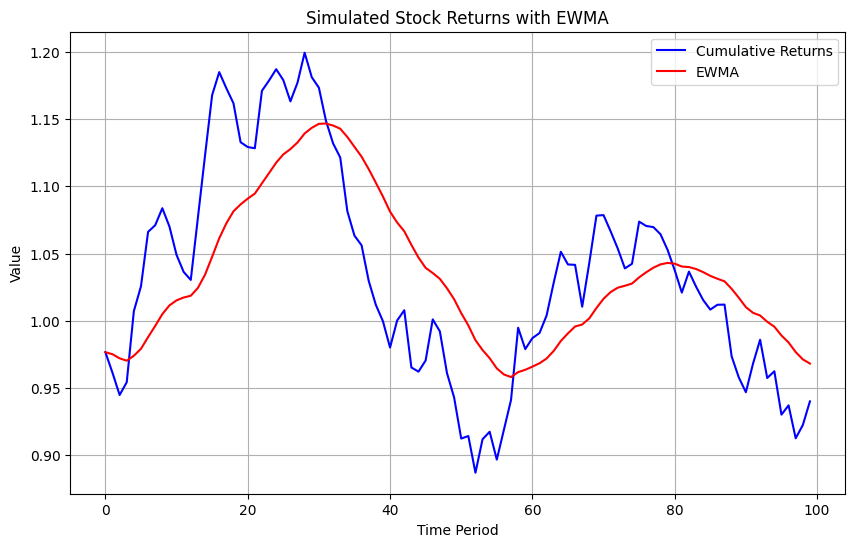

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_periods = 100
mu = 0.001  # average return
sigma = 0.02  # volatility
alpha = 0.1  # smoothing factor for EWMA

# Generate random stock returns
returns = np.random.normal(mu, sigma, num_periods)

# Calculate cumulative returns (random walk)
cumulative_returns = np.cumprod(1 + returns)  # Cumulative product of (1 + returns)

# Apply Exponentially Weighted Moving Average (EWMA)
ewma = np.zeros_like(cumulative_returns)
ewma[0] = cumulative_returns[0]  # Initial value is the same as the first observation

for t in range(1, len(cumulative_returns)):
    ewma[t] = (1 - alpha) * ewma[t - 1] + alpha * cumulative_returns[t]

# Plot the simulated returns and EWMA
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, color='blue', label='Cumulative Returns')
plt.plot(ewma, color='red', label='EWMA')
plt.title('Simulated Stock Returns with EWMA')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Holt's Linear Trend Model

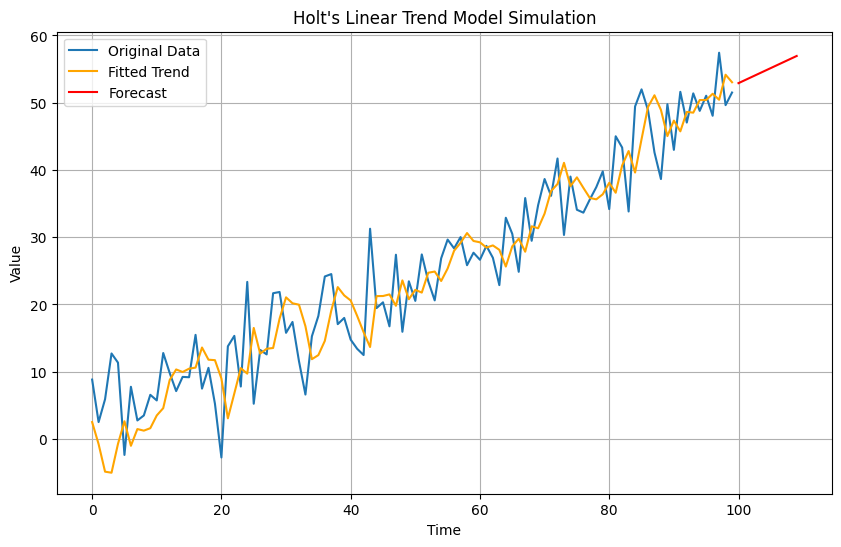

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

# Set random seed for reproducibility
np.random.seed(0)

# Generate time series data with trend
n_obs = 100
time = np.arange(n_obs)
trend = 0.5 * time  # Simulated linear trend
noise = np.random.normal(loc=0, scale=5, size=n_obs)  # Simulated noise
data = trend + noise

# Fit Holt's linear trend model
model = Holt(data)
fit = model.fit()

# Forecast future values
forecast_values = fit.forecast(steps=10)

# Plot the original data, fitted trend, and forecast
plt.figure(figsize=(10, 6))
plt.plot(time, data, label='Original Data')
plt.plot(time, fit.fittedvalues, color='orange', label='Fitted Trend')
plt.plot(np.arange(n_obs, n_obs + 10), forecast_values, color='red', label='Forecast')
plt.title("Holt's Linear Trend Model Simulation")
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Holt-Winters

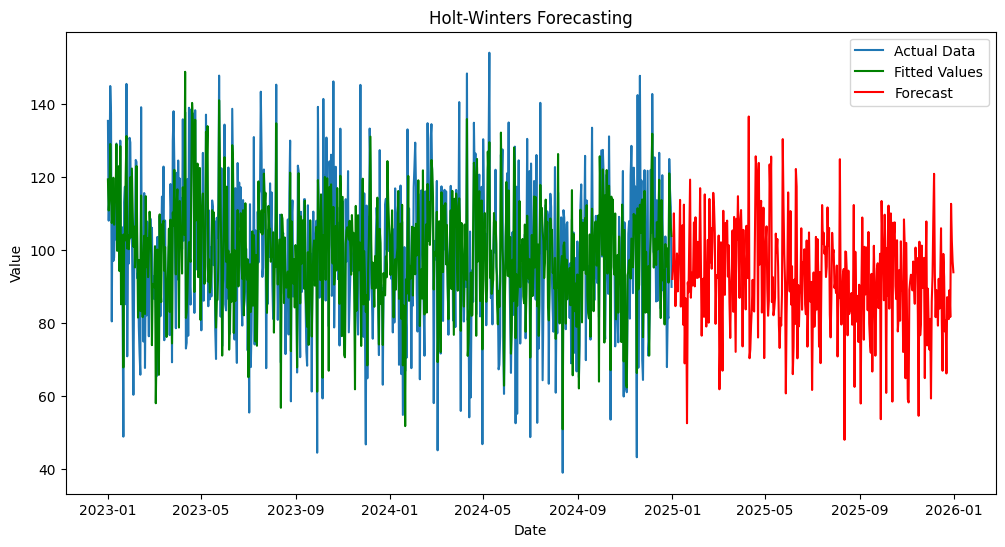

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate some sample data
np.random.seed(0)
index = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D')
data = np.random.normal(loc=100, scale=20, size=len(index))
ts_data = pd.Series(data, index=index)

# Perform Holt-Winters forecasting
model = ExponentialSmoothing(ts_data, trend='add', seasonal='add', seasonal_periods=365)
fit_model = model.fit()

# Forecast for the next year
forecast = fit_model.forecast(steps=365)

# Plot the original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Actual Data')
plt.plot(fit_model.fittedvalues, label='Fitted Values', color='green')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Holt-Winters Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## ARIMA

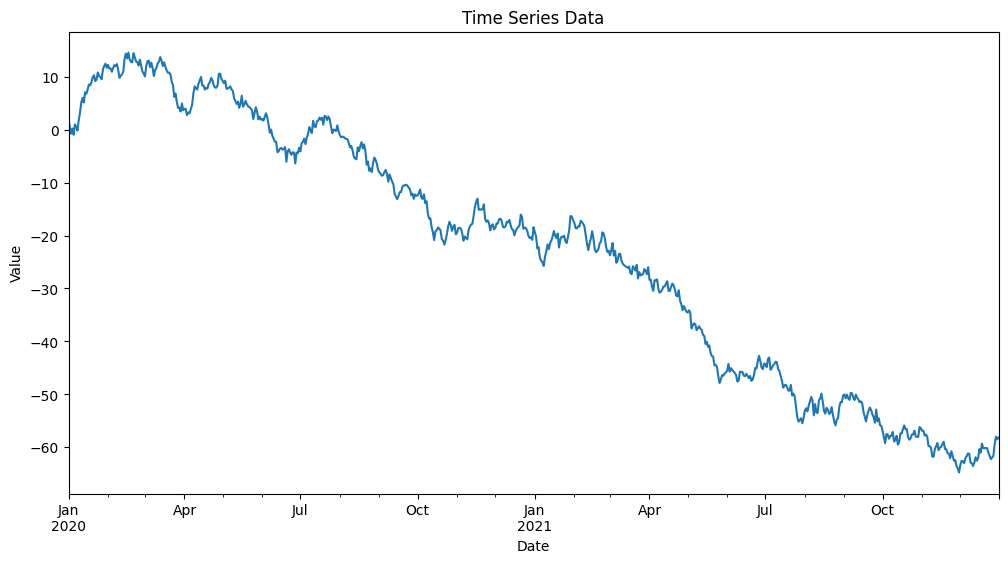

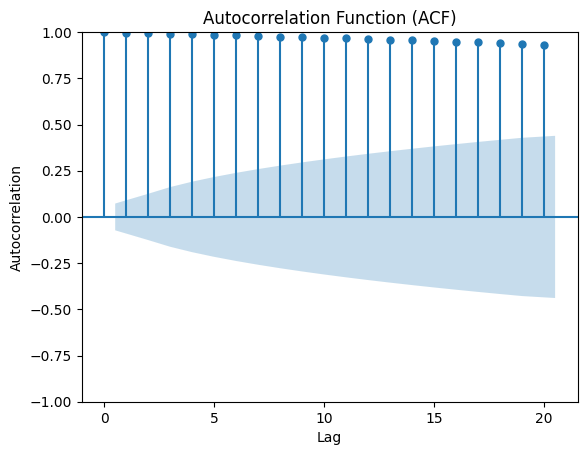

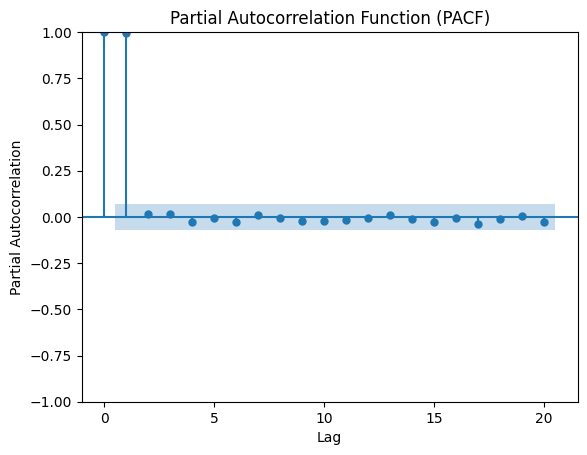

/home/amal/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/amal/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/amal/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  731
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1029.604
Date:                Mon, 05 Feb 2024   AIC                           2065.208
Time:                        22:29:30   BIC                           2078.987
Sample:                    01-01-2020   HQIC                          2070.524
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1875      1.148     -0.163      0.870      -2.438       2.063
ma.L1          0.1563      1.154      0.135      0.892      -2.105       2.418
sigma2         0.9831      0.052     18.753      0.0

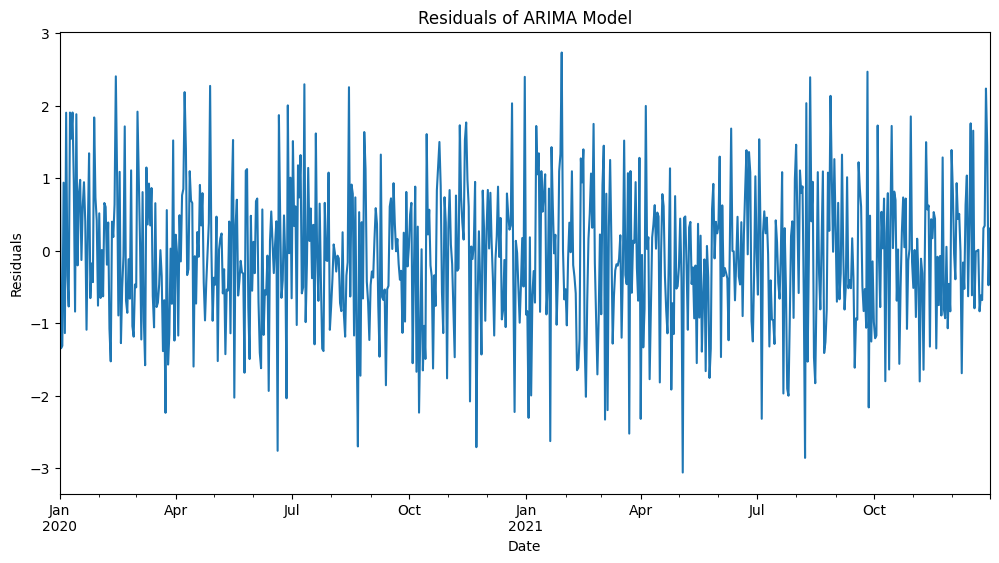

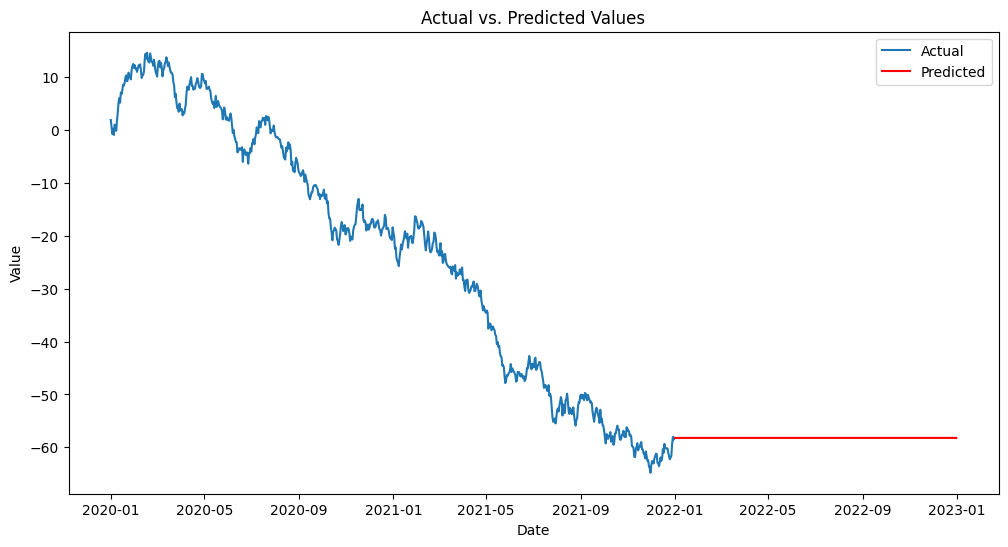

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate or load your time series data
# For example, you can load data from a CSV file or generate synthetic data

# Assuming you have a pandas DataFrame with a 'date' index and a 'value' column
# For demonstration purposes, let's create a synthetic time series
date_range = pd.date_range(start='2020-01-01', end='2021-12-31', freq='D')
values = np.random.randn(len(date_range)).cumsum()
data = pd.DataFrame({'date': date_range, 'value': values})
data.set_index('date', inplace=True)

# Visualize the time series
data['value'].plot(figsize=(12, 6))
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Plot ACF and PACF to determine ARIMA parameters
plot_acf(data['value'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plot_pacf(data['value'], lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

# Fit ARIMA model
# Determine the appropriate values for p, d, and q based on ACF and PACF plots
p = 1  # AR order
d = 1  # differencing
q = 1  # MA order

# Instantiate and fit the ARIMA model
model = ARIMA(data['value'], order=(p, d, q))
results = model.fit()

# Summary of the model
print(results.summary())

# Plot residuals
residuals = pd.Series(results.resid)
residuals.plot(figsize=(12, 6))
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Make predictions
start_date = '2022-01-01'
end_date = '2022-12-31'
forecast = results.predict(start=start_date, end=end_date, dynamic=True)

# Visualize actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(data['value'], label='Actual')
plt.plot(forecast, color='red', label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
